# Metacritic EDA and Cleaning

In [1]:
import numpy as np
import pandas as pd
import re

import matplotlib.pyplot as plt
from sklearn.metrics import  pairwise_distances

%matplotlib inline


#KNearest

In [2]:
df = pd.read_csv('metacritic.csv', index_col=[0])

In [3]:
df.head()

,is_critic,reviewer_id,reviewer_score,url,title,genre
0,1,GamingXP,35,007-legends,007 Legends (PC),Action
1,1,LEVEL (Czech Republic),30,007-legends,007 Legends (PC),Action
2,1,PC Master (Greece),28,007-legends,007 Legends (PC),Action
3,1,Riot Pixels,25,007-legends,007 Legends (PC),Action
4,1,PC Gamer,16,007-legends,007 Legends (PC),Action


In [4]:
len(df)

221303

In [5]:
df.tail(1)

,is_critic,reviewer_id,reviewer_score,url,title,genre
221302,0,BasilZero,8,crimzon-clover-world-ignition,Crimzon Clover WORLD IGNITION (PC),Action


## Fixing Reviewer Scores
Critic scores(1) are based on a scale of 1-100 while user scores(0) are based on a scale of 1-10. We are going to average the Critic scores down to a scale of 1-10.

In [6]:
df.head()

,is_critic,reviewer_id,reviewer_score,url,title,genre
0,1,GamingXP,35,007-legends,007 Legends (PC),Action
1,1,LEVEL (Czech Republic),30,007-legends,007 Legends (PC),Action
2,1,PC Master (Greece),28,007-legends,007 Legends (PC),Action
3,1,Riot Pixels,25,007-legends,007 Legends (PC),Action
4,1,PC Gamer,16,007-legends,007 Legends (PC),Action


## Creating a norm_score column
I create a norm_score column to compare and check how the revised scores match up to the originals...

In [7]:
#Create test score for where critics are present in the df and multiply them by .1
df['norm_score'] = np.where(df['is_critic'] == 1, df['reviewer_score'] * 0.1, df['reviewer_score'])

#Round the score to a single int like those of the user reviews.
df['norm_score'] = [int(round(x)) for x in df.norm_score]

In [8]:
df.head(50) # Looks like the functions worked here...

,is_critic,reviewer_id,reviewer_score,url,title,genre,norm_score
0,1,GamingXP,35,007-legends,007 Legends (PC),Action,4
1,1,LEVEL (Czech Republic),30,007-legends,007 Legends (PC),Action,3
2,1,PC Master (Greece),28,007-legends,007 Legends (PC),Action,3
3,1,Riot Pixels,25,007-legends,007 Legends (PC),Action,3
4,1,PC Gamer,16,007-legends,007 Legends (PC),Action,2
5,1,GamingXP,35,007-legends,007 Legends (PC),Action,4
6,1,LEVEL (Czech Republic),30,007-legends,007 Legends (PC),Action,3
7,1,PC Master (Greece),28,007-legends,007 Legends (PC),Action,3
8,1,Riot Pixels,25,007-legends,007 Legends (PC),Action,3
9,1,PC Gamer,16,007-legends,007 Legends (PC),Action,2


In [9]:
#Let's make sure there are no values greater than 10
print df.norm_score.value_counts()
print '-'*20
print 'null values: ' + str(df.norm_score.isnull().sum())

10    45868
9     39127
8     38270
7     24731
0     19254
6     15432
5     11246
4      8289
3      6766
1      6665
2      5655
Name: norm_score, dtype: int64
--------------------
null values: 0


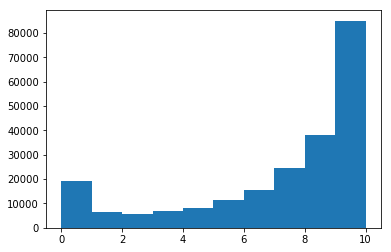

In [10]:
plt.hist(df.norm_score, bins=10);

## Merging smaller genres into more popular groups

In [11]:
df.genre.value_counts()

Action                          64873
Role-Playing                    37555
Strategy                        33996
Action Adventure                19437
General                         11727
Adventure                       11201
Simulation                       6867
Miscellaneous                    6010
Driving                          5132
Sports                           4408
Sci-Fi                           3318
Action RPG                       2236
PC-style RPG                     1986
Massively Multiplayer Online     1889
First-Person                     1880
Fantasy                          1845
Modern                           1447
Shooter                          1204
Horror                            946
Historic                          484
Racing                            466
Platformer                        436
Card Battle                       395
Compilation                       286
Puzzle                            275
City Building                     209
Tycoon      

### So, we have a game set in World War 2 classified under a WWI genre... Yeah that needs to be fixed.

In [12]:
df['title'].loc[df['genre'] == 'WWI'].value_counts()

IL-2 Sturmovik: Battle of Stalingrad (PC)    69
Name: title, dtype: int64

### First let's make a list of genres we can grab titles from...

In [13]:
df.genre.value_counts()

Action                          64873
Role-Playing                    37555
Strategy                        33996
Action Adventure                19437
General                         11727
Adventure                       11201
Simulation                       6867
Miscellaneous                    6010
Driving                          5132
Sports                           4408
Sci-Fi                           3318
Action RPG                       2236
PC-style RPG                     1986
Massively Multiplayer Online     1889
First-Person                     1880
Fantasy                          1845
Modern                           1447
Shooter                          1204
Horror                            946
Historic                          484
Racing                            466
Platformer                        436
Card Battle                       395
Compilation                       286
Puzzle                            275
City Building                     209
Tycoon      

In [14]:
list(df['title'].loc[df['genre'] == 'Fighting'].unique())

['Deadpool (PC)',
 'Super ComboMan (PC)',
 'Ultra Street Fighter IV (PC)',
 'Yatagarasu: Attack on Cataclysm (PC)']

In [15]:
# Gather a list of dictionaries featuring each game title for any genre with less than 6 titles.
empty_genres = []

# Go through different genres
for i in df['genre'].unique():
    if len(df['title'].loc[df['genre'] == i].unique()) < 6:
        for x in list(df['title'].loc[df['genre'] == i].unique()):
            duds = {}

            duds['genre'] = i
            duds['game'] = x

            empty_genres.append(duds)

In [16]:
empty_genre_df = pd.DataFrame(empty_genres)

In [17]:
empty_genre_df

,game,genre
0,Act of Aggression (PC),Military
1,Atlas Reactor (PC),Turn-Based
2,Call of Duty: Modern Warfare Remastered (PC),Arcade
3,Car Mechanic Simulator 2015 (PC),Sim
4,Check vs Mate (PC),Board Games
5,Cities: Skylines (PC),City Building
6,Combat Mission: Battle for Normandy (PC),Wargame
7,Cosmic Star Heroine (PC),Console-style RPG
8,Blade & Soul (PC),Massively Multiplayer Online
9,Defiance (PC),Massively Multiplayer Online


In [18]:
empty_genre_df.genre.value_counts()

Massively Multiplayer Online    4
Fighting                        4
Scrolling                       3
Third-Person                    2
Tycoon                          2
Card Battle                     2
GT / Street                     1
City Building                   1
Compilation                     1
Arcade                          1
Wargame                         1
Board Games                     1
Formula One                     1
Rail                            1
Console-style RPG               1
Sim                             1
Traditional                     1
Japanese-Style                  1
Turn-Based                      1
Music                           1
Alternative                     1
Military                        1
WWI                             1
Futuristic                      1
Name: genre, dtype: int64

## Something is odd about these genres...
After taking a look, I discovered that some games had a single genre title while others had multiple. I needed to re-scrape the genres into a string of descriptive titles which I am now going to clean up and append to the new list.

In [19]:
#importing the re-scraped data from their CSV files...
gen1 = pd.read_csv('CSV files/fullgenre.csv')
gen2 = pd.read_csv('CSV files/fullgenre1.csv')

In [20]:
gen1.tail()

,genre,url
1895,"[Action Adventure, Fantasy, General, Fantasy]",harry-potter-and-the-half-blood-prince
1896,"[Action Adventure, Fantasy, General, Fantasy]",harry-potter-and-the-order-of-the-phoenix
1897,"[Action Adventure, Fantasy, General, Fantasy]",harry-potter-and-the-prisoner-of-azkaban
1898,"[Action Adventure, Fantasy, General, Fantasy]",harry-potter-and-the-sorcerers-stone
1899,"[Sports, Alternative, Team, Individual, Other,...",harry-potter-quidditch-world-cup


### Merging the two CSV DF together...

In [21]:
gen2.head()

,genre,url
0,"[Adventure, General, General, Point-and-Click]",harvester
1,"[Strategy, Turn-Based, General, Tactics]",has-been-heroes
2,"[General, Adventure, General, Visual Novel]",hatoful-boyfriend
3,"[General, Adventure, General, Visual Novel]",hatoful-boyfriend-holiday-star
4,"[Modern, Action, Shooter, Third-Person, Shoot-...",hatred


In [22]:
genre_df = gen1.append(gen2, ignore_index=True)

In [23]:
# checks out...
print len(genre_df)
print len(gen1) + len(gen2)

4815
4815


In [24]:
# Looks like we didn't overlap or duplicate anything either.
genre_df[1897:1902]

,genre,url
1897,"[Action Adventure, Fantasy, General, Fantasy]",harry-potter-and-the-prisoner-of-azkaban
1898,"[Action Adventure, Fantasy, General, Fantasy]",harry-potter-and-the-sorcerers-stone
1899,"[Sports, Alternative, Team, Individual, Other,...",harry-potter-quidditch-world-cup
1900,"[Adventure, General, General, Point-and-Click]",harvester
1901,"[Strategy, Turn-Based, General, Tactics]",has-been-heroes


## Cleaning up the genre column
We need to remove the brackets from the ends and remove duplicate entries from the rows.

In [25]:
for i in range(len(genre_df)):
    genre_df.genre[i] = genre_df.genre[i][1:-1]

In [26]:
genre_df.head()

,genre,url
0,"Action, Shooter, Shooter, First-Person, Modern...",007-legends
1,"Action, Shooter, Shooter, First-Person, Modern...",007-nightfire
2,"Action, General, Shooter, Shooter, First-Perso...",007-quantum-of-solace
3,"Miscellaneous, Puzzle, Action",0rbitalis
4,"Action, Platformer, 2D",10-second-ninja


In [27]:
genre_df.genre[1]

'Action, Shooter, Shooter, First-Person, Modern, Modern, Arcade'

In [28]:
genre_df.genre[1].split()

['Action,',
 'Shooter,',
 'Shooter,',
 'First-Person,',
 'Modern,',
 'Modern,',
 'Arcade']

In [29]:
# Removing the duplicate entries inside the genre categories...
for i in range(len(genre_df.genre)):
    words = genre_df.genre[i].split()
    genre_df.genre[i] = " ".join(sorted(set(words), key=words.index))

In [30]:
# # Removing the duplicate entries inside the genre categories... & Trim down label count
# for i in range(len(genre_df.genre)):
#     words = genre_df.genre[i].split()[:2]
#     genre_df.genre[i] = " ".join(sorted(set(words), key=words.index))

In [31]:
listofwords=[]
for i in genre_df.genre:
    w = i.split()
    for s in w:
        listofwords.append(s)

In [32]:
uniquegenres = set(listofwords)

In [33]:
uniquegenres

{'/',
 '2D',
 '2D,',
 '3D',
 '3D,',
 '4X',
 'Action',
 'Action,',
 'Adventure,',
 'Alternative,',
 'Arcade',
 'Arcade,',
 'Artillery',
 'Arts',
 'Athletics',
 'Automobile',
 'Automobile,',
 'Baseball,',
 'Basketball,',
 'Battle',
 'Battle,',
 "Beat-'Em-Up",
 "Beat-'Em-Up,",
 'Biking',
 'Biking,',
 'Billiards',
 'Billiards,',
 'Board',
 'Bowling',
 'Bowling,',
 'Boxing',
 'Breeding/Constructing',
 'Breeding/Constructing,',
 'Building,',
 'Business',
 'Car',
 'Car,',
 'Card',
 'Career',
 'Career,',
 'City',
 'Civilian',
 'Combat',
 'Combat,',
 'Command',
 'Compilation',
 'Compilation,',
 'Console-style',
 'Cricket',
 'Cricket,',
 'Defense',
 'Defense,',
 'Demolition',
 'Derby',
 'Derby,',
 'Driving,',
 'Edutainment',
 'Edutainment,',
 'Fantasy',
 'Fantasy,',
 'Fighting,',
 'First-Person',
 'First-Person,',
 'Flight,',
 'Football,',
 'Formula',
 'Futuristic',
 'Futuristic,',
 'GT',
 'Gambling',
 'Gambling,',
 'Game',
 'Game,',
 'Games',
 'Games,',
 'General',
 'General,',
 'Golf,',
 'Gove

## Merging fixed genres to the Metacritic DF

In [34]:
df.head(2)

,is_critic,reviewer_id,reviewer_score,url,title,genre,norm_score
0,1,GamingXP,35,007-legends,007 Legends (PC),Action,4
1,1,LEVEL (Czech Republic),30,007-legends,007 Legends (PC),Action,3


In [35]:
df = pd.merge(df, genre_df, on='url')

In [36]:
df.head()

,is_critic,reviewer_id,reviewer_score,url,title,genre_x,norm_score,genre_y
0,1,GamingXP,35,007-legends,007 Legends (PC),Action,4,"Action, Shooter, First-Person, Modern, Arcade"
1,1,LEVEL (Czech Republic),30,007-legends,007 Legends (PC),Action,3,"Action, Shooter, First-Person, Modern, Arcade"
2,1,PC Master (Greece),28,007-legends,007 Legends (PC),Action,3,"Action, Shooter, First-Person, Modern, Arcade"
3,1,Riot Pixels,25,007-legends,007 Legends (PC),Action,3,"Action, Shooter, First-Person, Modern, Arcade"
4,1,PC Gamer,16,007-legends,007 Legends (PC),Action,2,"Action, Shooter, First-Person, Modern, Arcade"


In [37]:
# dropping the old genre column and renaming the new one.
del df['genre_x']
df = df.rename(columns = {'genre_y':'genre'})

In [38]:
df.head()

,is_critic,reviewer_id,reviewer_score,url,title,norm_score,genre
0,1,GamingXP,35,007-legends,007 Legends (PC),4,"Action, Shooter, First-Person, Modern, Arcade"
1,1,LEVEL (Czech Republic),30,007-legends,007 Legends (PC),3,"Action, Shooter, First-Person, Modern, Arcade"
2,1,PC Master (Greece),28,007-legends,007 Legends (PC),3,"Action, Shooter, First-Person, Modern, Arcade"
3,1,Riot Pixels,25,007-legends,007 Legends (PC),3,"Action, Shooter, First-Person, Modern, Arcade"
4,1,PC Gamer,16,007-legends,007 Legends (PC),2,"Action, Shooter, First-Person, Modern, Arcade"


In [39]:
df.reviewer_id.value_counts().mean()

2.592250295767884

In [40]:
df.to_csv('metacritic_genre.csv')

In [41]:
df.genre[:20]

0     Action, Shooter, First-Person, Modern, Arcade
1     Action, Shooter, First-Person, Modern, Arcade
2     Action, Shooter, First-Person, Modern, Arcade
3     Action, Shooter, First-Person, Modern, Arcade
4     Action, Shooter, First-Person, Modern, Arcade
5     Action, Shooter, First-Person, Modern, Arcade
6     Action, Shooter, First-Person, Modern, Arcade
7     Action, Shooter, First-Person, Modern, Arcade
8     Action, Shooter, First-Person, Modern, Arcade
9     Action, Shooter, First-Person, Modern, Arcade
10    Action, Shooter, First-Person, Modern, Arcade
11    Action, Shooter, First-Person, Modern, Arcade
12    Action, Shooter, First-Person, Modern, Arcade
13    Action, Shooter, First-Person, Modern, Arcade
14    Action, Shooter, First-Person, Modern, Arcade
15    Action, Shooter, First-Person, Modern, Arcade
16    Action, Shooter, First-Person, Modern, Arcade
17    Action, Shooter, First-Person, Modern, Arcade
18    Action, Shooter, First-Person, Modern, Arcade
19    Action

In [42]:
sample = df.genre[2]
a = sample.split(', ')
print a

gendums = df['genre'].str.get_dummies(sep=', ')

['Action', 'Shooter', 'First-Person', 'Modern', 'Arcade']


In [43]:
df.shape

(221303, 7)

In [44]:
gendums.shape

(221303, 178)

## Setting up a KNeighborsClassifier to test on the dataset...
I will be using a KNeighborsClassifier to predit and suggest games base on user and critic reviews.

In [45]:
from scipy import sparse
from sklearn.neighbors import KNeighborsClassifier

In [46]:
df.head()

,is_critic,reviewer_id,reviewer_score,url,title,norm_score,genre
0,1,GamingXP,35,007-legends,007 Legends (PC),4,"Action, Shooter, First-Person, Modern, Arcade"
1,1,LEVEL (Czech Republic),30,007-legends,007 Legends (PC),3,"Action, Shooter, First-Person, Modern, Arcade"
2,1,PC Master (Greece),28,007-legends,007 Legends (PC),3,"Action, Shooter, First-Person, Modern, Arcade"
3,1,Riot Pixels,25,007-legends,007 Legends (PC),3,"Action, Shooter, First-Person, Modern, Arcade"
4,1,PC Gamer,16,007-legends,007 Legends (PC),2,"Action, Shooter, First-Person, Modern, Arcade"


### We need to set a numeric reviewer_id for the matrix.

In [47]:
reviewer_number = []
count = 0
for i in df.reviewer_id.unique():
    entry = {}
    entry['reviewer_id'] = i
    entry['number'] = count
    count += 1
    reviewer_number.append(entry)

In [48]:
len(reviewer_number)

85371

In [49]:
reviewer_df = pd.DataFrame(reviewer_number)

In [50]:
reviewer_df.head()

,number,reviewer_id
0,0,GamingXP
1,1,LEVEL (Czech Republic)
2,2,PC Master (Greece)
3,3,Riot Pixels
4,4,PC Gamer


In [51]:
df = pd.merge(df, reviewer_df, on='reviewer_id')

In [52]:
df.head()

,is_critic,reviewer_id,reviewer_score,url,title,norm_score,genre,number
0,1,GamingXP,35,007-legends,007 Legends (PC),4,"Action, Shooter, First-Person, Modern, Arcade",0
1,1,GamingXP,35,007-legends,007 Legends (PC),4,"Action, Shooter, First-Person, Modern, Arcade",0
2,1,GamingXP,35,007-legends,007 Legends (PC),4,"Action, Shooter, First-Person, Modern, Arcade",0
3,1,GamingXP,81,15-days,15 Days (PC),8,"Adventure, General, Point-and-Click",0
4,1,GamingXP,81,15-days,15 Days (PC),8,"Adventure, General, Point-and-Click",0


In [53]:
# Rename the columns to not confuse anyone.
df = df.rename(columns={'reviewer_id': 'reviewer_name', 'number': 'reviewer_id'})

In [54]:
df.head()

,is_critic,reviewer_name,reviewer_score,url,title,norm_score,genre,reviewer_id
0,1,GamingXP,35,007-legends,007 Legends (PC),4,"Action, Shooter, First-Person, Modern, Arcade",0
1,1,GamingXP,35,007-legends,007 Legends (PC),4,"Action, Shooter, First-Person, Modern, Arcade",0
2,1,GamingXP,35,007-legends,007 Legends (PC),4,"Action, Shooter, First-Person, Modern, Arcade",0
3,1,GamingXP,81,15-days,15 Days (PC),8,"Adventure, General, Point-and-Click",0
4,1,GamingXP,81,15-days,15 Days (PC),8,"Adventure, General, Point-and-Click",0


In [55]:
df.to_csv('metacriticfortuning.csv')

In [56]:
pivot = df.pivot_table(index='reviewer_id', columns='title', values='norm_score')

In [57]:
pivot.shape

(85371, 4457)

In [58]:
pivot.head()

title,007 Legends (PC),007: NightFire (PC),007: Quantum of Solace (PC),0RBITALIS (PC),10 Second Ninja (PC),"10,000,000 (PC)",1001 Spikes (PC),12 is Better Than 6 (PC),140 (PC),15 Days (PC),...,Zoo Tycoon: Marine Mania (PC),Zuma's Revenge! (PC),continue?9876543210 (PC),iRacing (PC),imprint-X (PC),inMomentum (PC),kill.switch (PC),nail'd (PC),rymdkapsel (PC),theHunter: Call of the Wild (PC)
reviewer_id,,,,,,,,,,,,,,,,,,,,,
0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,...,NaN,6.0,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN
1,3.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,...,NaN,NaN,NaN,NaN,NaN,5.0,NaN,6.0,8.0,NaN
2,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.0,NaN,NaN,NaN,NaN,7.0,8.0,NaN,6.0


In [59]:
# reviewer 0's reviews for titles
pivot.loc[0, :].sort_values(ascending=False)

title
The Elder Scrolls V: Skyrim (PC)                 10.0
Mass Effect 3 (PC)                               10.0
Battlefield 3 (PC)                               10.0
Portal 2 (PC)                                    10.0
Osmos (PC)                                       10.0
Lost Horizon (PC)                                 9.0
Call of Duty: World at War (PC)                   9.0
Space Siege (PC)                                  9.0
Singularity (PC)                                  9.0
L.A. Noire: The Complete Edition (PC)             9.0
Farming Simulator 2013 (PC)                       9.0
Spore (PC)                                        9.0
Kingdoms of Amalur: Reckoning (PC)                9.0
Sid Meier's Civilization V: Gods & Kings (PC)     9.0
Sid Meier's Civilization V (PC)                   9.0
ArmA II (PC)                                      9.0
Shattered Horizon (PC)                            9.0
ArmA II: Operation Arrowhead (PC)                 9.0
SpellForce 2: Faith in

In [60]:
#all user ratings for Battlefield 3 (PC)
pivot.loc[:,'Battlefield 3 (PC)'].sort_values(ascending=False)

reviewer_id
18929    10.0
18283    10.0
18238    10.0
18236    10.0
18235    10.0
18234    10.0
18233    10.0
18232    10.0
18230    10.0
18228    10.0
18225    10.0
18221    10.0
18219    10.0
18217    10.0
18216    10.0
18215    10.0
18214    10.0
18212    10.0
18211    10.0
18207    10.0
18206    10.0
18196    10.0
18194    10.0
18193    10.0
18192    10.0
18239    10.0
18241    10.0
18242    10.0
18262    10.0
18276    10.0
         ... 
85341     NaN
85342     NaN
85343     NaN
85344     NaN
85345     NaN
85346     NaN
85347     NaN
85348     NaN
85349     NaN
85350     NaN
85351     NaN
85352     NaN
85353     NaN
85354     NaN
85355     NaN
85356     NaN
85357     NaN
85358     NaN
85359     NaN
85360     NaN
85361     NaN
85362     NaN
85363     NaN
85364     NaN
85365     NaN
85366     NaN
85367     NaN
85368     NaN
85369     NaN
85370     NaN
Name: Battlefield 3 (PC), Length: 85371, dtype: float64

In [61]:
#turn into sparse matrix and replace nan values with 0
pivotsparse = sparse.csc_matrix(pivot.fillna(0).values)

In [62]:
print pivotsparse

  (0, 0)	4.0
  (1, 0)	3.0
  (2, 0)	3.0
  (3, 0)	3.0
  (4, 0)	2.0
  (12, 0)	10.0
  (13, 0)	1.0
  (14, 0)	10.0
  (15, 0)	8.0
  (16, 0)	3.0
  (17, 0)	7.0
  (18, 0)	6.0
  (20, 0)	2.0
  (21, 0)	5.0
  (22, 0)	7.0
  (23, 0)	5.0
  (24, 0)	7.0
  (26, 0)	3.0
  (28, 0)	3.0
  (29, 0)	9.0
  (4, 1)	6.0
  (28, 1)	6.0
  (30, 1)	9.0
  (31, 1)	8.0
  (32, 1)	8.0
  :	:
  (1, 4455)	8.0
  (85, 4455)	9.0
  (96, 4455)	8.0
  (188, 4455)	7.0
  (270, 4455)	7.0
  (5468, 4455)	10.0
  (14236, 4455)	5.0
  (75013, 4455)	7.0
  (4, 4456)	6.0
  (87, 4456)	8.0
  (159, 4456)	7.0
  (183, 4456)	5.0
  (188, 4456)	8.0
  (189, 4456)	6.0
  (194, 4456)	6.0
  (273, 4456)	6.0
  (511, 4456)	4.0
  (785, 4456)	7.0
  (787, 4456)	7.0
  (4199, 4456)	4.0
  (80111, 4456)	9.0
  (80112, 4456)	9.0
  (80113, 4456)	10.0
  (80114, 4456)	10.0
  (80115, 4456)	10.0


In [63]:
distances = pairwise_distances(pivotsparse.T, metric='cosine')

In [64]:
distances.shape

(4457, 4457)

In [68]:
distances[1]

array([ 0.96141268,  0.        ,  0.86718569, ...,  0.9525862 ,
        1.        ,  0.96124684])

In [ ]:
#we set up a dataframe with the distances as the data, and the pivot table columns for rows and columns
distances_df = pd.DataFrame(distances, index=pivot.columns, columns=pivot.columns)

In [ ]:
distances_df.head()

In [ ]:
#Now we have movies with the most similar vectors. The first one is obviously correlated. 
distances_df.loc[:, 'World of Tanks (PC)'].sort_values()

In [ ]:
df.title.unique()

In [ ]:
# we need a function to find a movie that is not ultra specefic.
guess = 'Final Fantasy XIV'

titles = df.loc[df['title'].str.contains(guess), 'title'].unique()
for title in titles:
    print title
    print ''
    print 'Average Rating:'
    print pivot[title].mean()
    print ''
    print 'Number of Ratings:'
    print pivot[title].count()
    print ''
    print 'Similar titles:'
    print distances_df.loc[title].sort_values()[1:11]
    print '--'*10
    print ''